## Challange Titanic

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Challange Titanic on Kaggle [here](https://www.kaggle.com/c/titanic).

**SETUP**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("data/train.csv")

In [3]:
df_test = pd.read_csv("data/test.csv")

In [4]:
df_genderSubmission = pd.read_csv("data/gender_submission.csv")

**PRE PROCESSING**

Analyzing the datasets

We have 3 datasets:

* df_train: To train the algorithm.
* df_test: To test the accuracy of the algorithm.
* df_genderSubmission: Validate the model.

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_genderSubmission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Checking the volume and types of data in the dataset. You can check the column names.

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Survived**

In the training data set, approximately 62% of passengers died.

In [11]:
df_train['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

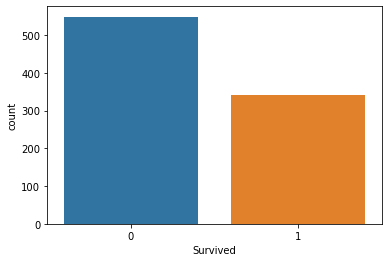

In [12]:
sns.countplot(df_train['Survived'])

**Missing Values**

Checking missing values

In [13]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In both datasets we have variables with missing values. For our analysis we need to address these values.

Before treating null values, let's remove the variables that do not influence the analysis:

* Ticket: the ticket number is not so relevant in identifying the survivors.
* Cabin: the cabin number can be interesting and indicate the chance of survival, however we have other variables like Pclass.

In [15]:
ids = df_test.PassengerId
df_train = df_train.drop(['Ticket','Cabin','Name'], axis=1)
df_test = df_test.drop(['Ticket','Cabin','Name'], axis=1)

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Checking our dataset we have null values for Age and Fare, we will replace our missing values with the median. The median is the central trend of the values and to replace null values in a dataset it is more robust than the average.

In [17]:
age_median = df_train['Age'].median()
df_train['Age'].fillna(value = age_median, inplace=True)

In [18]:
age_median = df_test['Age'].median()
df_test['Age'].fillna(value = age_median, inplace=True)

In [19]:
median_fare = df_test['Fare'].mean()
df_test['Fare'].fillna(value=median_fare, inplace=True)

Embarked has 2 missing values, we will replace them with the Embarked mode.

In [22]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


 Now let's check the data correlations:

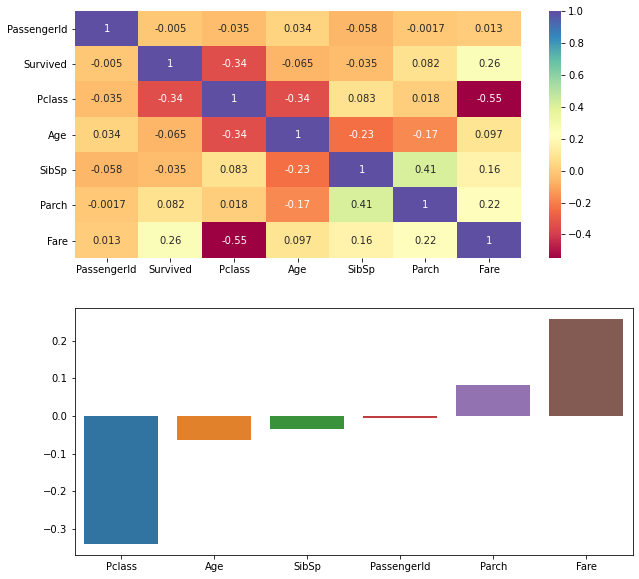

In [23]:
fig, axes = plt.subplots(2,1, figsize = (10,10))
sns.heatmap(df_train.corr(), cmap = 'Spectral', annot = True, ax=axes[0])
temp = df_train.corrwith(df_train['Survived']).sort_values().drop('Survived')
sns.barplot(temp.index,temp.values,ax=axes[1]);

**Age**

Let's check the histogram of the age distribution of the passengers.

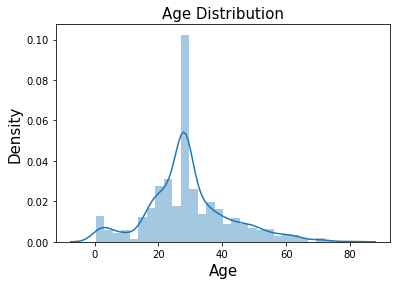

In [24]:
sns.distplot(df_train["Age"], kde=True, hist=True)
plt.title('Age Distribution', fontsize= 15)
plt.ylabel("Density", fontsize= 15)
plt.xlabel("Age", fontsize= 15)
plt.show();

**Sex**

Based on the film Titanic, we know that shipments in lifeboats were made in order of class (starting with first class) and women and children always. Let's look at the relationships of survivors by sex and class.

Text(0.5, 1.0, 'Male')

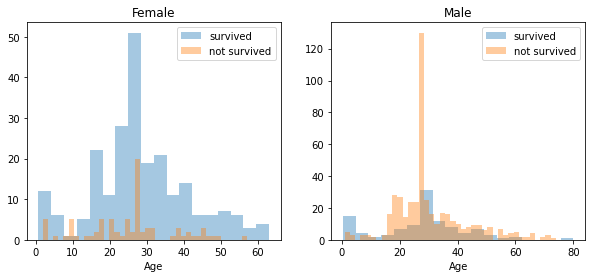

In [25]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

female = df_train[df_train['Sex']=='female']
male = df_train[df_train['Sex']=='male']

ax = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')


ax = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

**Class**

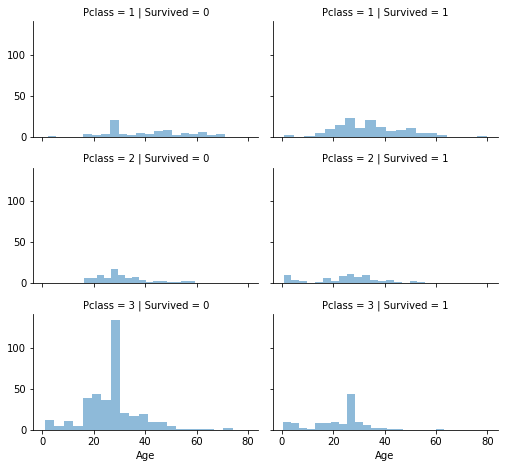

In [26]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Looking at the graphs it makes sense that most of the survivors are female and that the class that suffered the most losses is the third class, as they were the last to board the lifeboats.

However, this data makes us think of a speculation: having class 3 the smallest number of survivors, would this low number be only in the order of boarding the boats or did class 3 have more male passengers?

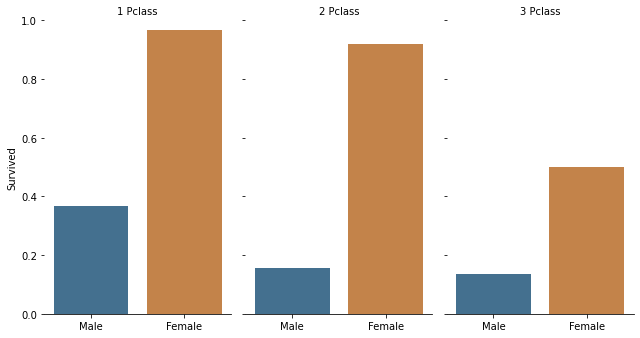

In [27]:
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                data=df_train, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survived")
  .set_xticklabels(["Male", "Female"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))

The Machine Learning model works with numbers, so we must transform categorical variables into numerical variables.

In [28]:
var_objects =  df_train.select_dtypes('object').columns
var_objects

Index(['Sex', 'Embarked'], dtype='object')

In [29]:
df_train = pd.get_dummies(df_train,columns=["Sex","Embarked"])

In [30]:
df_test = pd.get_dummies(df_test,columns=["Sex","Embarked"])

In [31]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [32]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [33]:
Y = df_train.Survived
X = df_train.drop(columns=["Survived"])
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


**Model Estimation and Evaluation**

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
df_test = sc.transform(df_test)
print(X.shape,df_test.shape);

(891, 11) (418, 11)


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape)

(712, 11) (712,) (179, 11) (179,)


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
modelRF = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
modelRF.fit(X_train,Y_train)
print("%.4f" % modelRF.oob_score_);

0.8329


In [41]:
from sklearn.metrics import classification_report

Y_pred = modelRF.predict(X_val)
print(classification_report(Y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       100
           1       0.83      0.62      0.71        79

   micro avg       0.78      0.78      0.78       179
   macro avg       0.79      0.76      0.76       179
weighted avg       0.79      0.78      0.77       179



In [43]:
Y_pred = modelRF.predict(df_test)
output = pd.DataFrame({'PassengerId': ids, 'Survived': Y_pred})
output.to_csv('survived.csv', index=False)